# Mapping Boulders

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import folium
import string

/anaconda2/lib/python2.7/site-packages/folium/__init__.py:59: UserWarning: This version of folium is the last to support Python 2. Transition to Python 3 to be able to receive updates and fixes. Check out https://python3statement.org/ for more info.
  UserWarning


#### This script pulls user generated data about the 1000 highest-rated boulder problems of a certain inputed difficulty from www.mountainproject.com and lists them in a pandas dataframe.

In [2]:
What_grade = int(raw_input('What grade would you like to see?'))

diffMaxboulder = str(What_grade*100+50+20000)
diffMinboulder = str(What_grade*100-50+20000)

URL = 'https://www.mountainproject.com/route-finder?diffMaxaid=75260&diffMaxboulder=20750&diffMaxice=38500&diffMaxmixed=60000&diffMaxrock=5500&diffMinaid=70000&diffMinboulder=20650&diffMinice=30000&diffMinmixed=50000&diffMinrock=1800&is_sport_climb=1&is_top_rope=1&is_trad_climb=1&pitches=0&selectedIds=0&sort1=popularity%20desc&sort2=area&stars=0&type=boulder&viewAll=0'

baseURL = 'https://www.mountainproject.com/route-finder'


parameters = {
    'diffMaxaid':'75260',
    'diffMaxboulder':diffMaxboulder,
    'diffMaxice':'38500',
    'diffMaxmixed':'60000',
    'diffMaxrock':'5500',
    'diffMinaid':'70000',
    'diffMinboulder':diffMinboulder,
    'diffMinice':'30000',
    'diffMinmixed':'50000',
    'diffMinrock':'1800',
    'is_sport_climb':'1',
    'is_top_rope':'1',
    'is_trad_climb':'1',
    'pitches':'0',
    'selectedIds':'0',
    'sort1':'popularity desc',
    'sort2':'area',
    'stars':'0',
    'type':'boulder',
    'viewAll':'0'
}
page = requests.get(baseURL,params=parameters)






soup = BeautifulSoup(page.text, 'html.parser')

thing = soup.find_all(class_='float-md-left')

csv_URL = (thing[0].find_all('a',rel=True)[0]['href'])




climbs = pd.read_csv(csv_URL)


coords_only = (climbs[['Area Latitude','Area Longitude']])

What grade would you like to see?7


In [5]:
climbs.head()

,Route,Location,URL,Avg Stars,Your Stars,Route Type,Rating,Pitches,Length,Area Latitude,Area Longitude
0,High Plains Drifter,Drifter/Smoking Boulder > Buttermilks Main > B...,https://www.mountainproject.com/route/10590812...,3.9,-1,Boulder,V7,1,35.0,37.32888,-118.57484
1,Tommy's Arete,The Automator Boulder > Lower Chaos Canyon > C...,https://www.mountainproject.com/route/10639052...,3.9,-1,"Boulder, Alpine",V7,1,NaN,40.30479,-105.66069
2,Planet of the Apes,Chip and Dale > New Joe's > Joe's Valley > Utah,https://www.mountainproject.com/route/10631895...,3.8,-1,Boulder,V7-,1,12.0,39.30838,-111.11474
3,Tennessee Thong,Stone Fort (aka Little Rock City) > Tennessee,https://www.mountainproject.com/route/10795072...,3.9,-1,Boulder,V7,1,NaN,35.24772,-85.22079
4,Bring the Heatwole,Heat Wall > Eden > Left Fork > Joe's Valley > ...,https://www.mountainproject.com/route/10659469...,3.6,-1,Boulder,V7,1,10.0,39.28498,-111.20722


#### This data includes coordinates, so the boulders can be mapped.  The following map is made using folium and is interactive; mousing over provides the boulder's name, while clicking provides details about its location.

In [3]:
folmap = folium.Map(location=[40, -95], tiles="Stamen Terrain", zoom_start=4)

def remove_non_ascii_1(text):

    return ''.join(i for i in text if ord(i)<128)

routenames = (climbs['Route']).values.tolist()
locationnames = climbs['Location'].values.tolist()

routenames = [remove_non_ascii_1(x) for x in routenames]
locationnames = [remove_non_ascii_1(y) for y in locationnames]


locationlist = climbs[["Area Latitude","Area Longitude"]].values.tolist()

for i in range(len(climbs)-1,-1,-1):
    
    folium.CircleMarker(locationlist[i], radius =2, tooltip=(routenames[i]),popup=locationnames[i]).add_to(folmap)





folmap

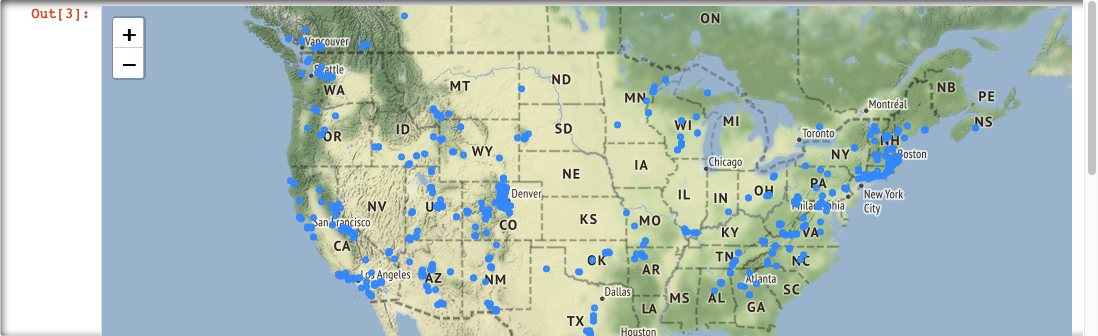

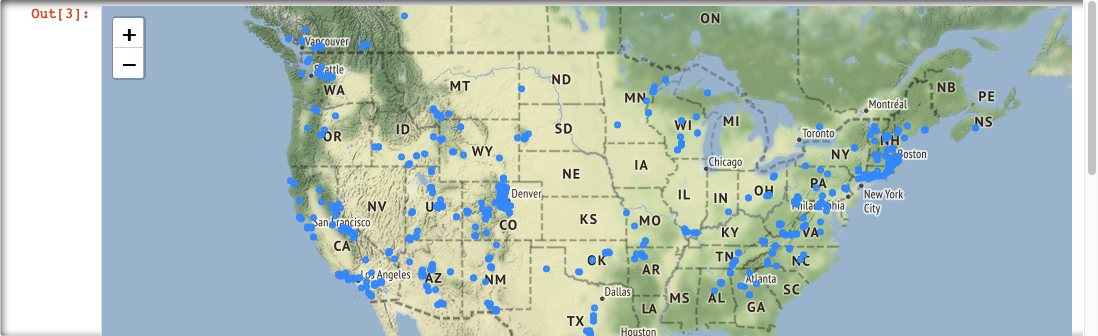

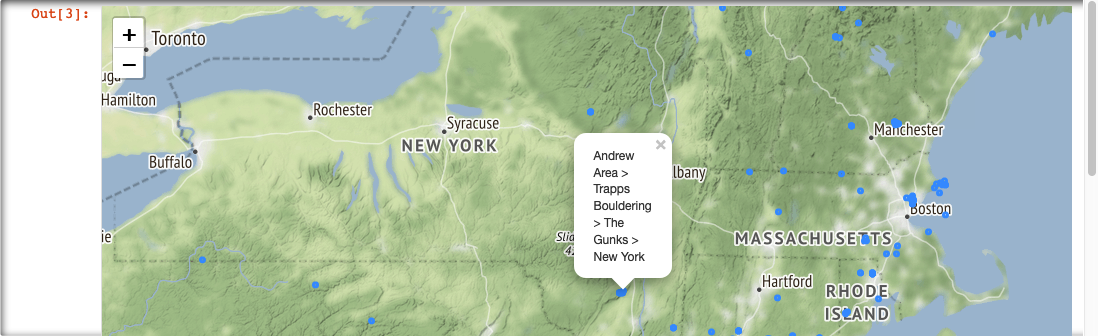